In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [5]:
import numpy as np
def vectorize_sequences(seq,dim=10000):
    res = np.zeros((len(seq),dim))
    for i, s in enumerate(seq):
        res[i,s] = 1.
    return res
x = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [27]:
from keras import models
from keras import layers
from keras import activations
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape = (10000,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [34]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.0005),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [35]:
xv = x[:10000]
xt = x[10000:]
yv = y[:10000]
yt = y[10000:]

In [36]:
hist = model.fit(xt,yt,epochs = 5,batch_size=512,validation_data = (xv,yv))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 153us/step - loss: 0.0810 - acc: 0.9875 - val_loss: 0.3187 - val_acc: 0.8812
Epoch 2/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.0709 - acc: 0.9888 - val_loss: 0.3257 - val_acc: 0.8795
Epoch 3/5
15000/15000 [==============================] - 2s 139us/step - loss: 0.0644 - acc: 0.9902 - val_loss: 0.3393 - val_acc: 0.8794
Epoch 4/5
15000/15000 [==============================] - 2s 138us/step - loss: 0.0588 - acc: 0.9904 - val_loss: 0.3476 - val_acc: 0.8784
Epoch 5/5
15000/15000 [==============================] - 2s 140us/step - loss: 0.0533 - acc: 0.9911 - val_loss: 0.3590 - val_acc: 0.8764


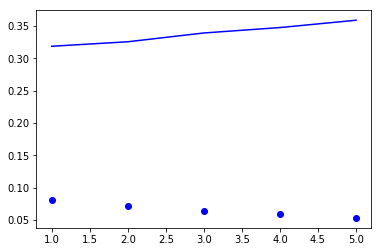

In [37]:
import matplotlib.pyplot as plt
hist_dict = hist.history
loss = hist_dict['loss']
vloss = hist_dict['val_loss']
epochs = range(1,len(hist_dict['acc'])+1)
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs, vloss, 'b',label = 'Validation loss')
plt.show()